In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


c:\Users\admin\AppData\Local\Programs\Python\Python312\python.exe: No module named pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import zipfile
plt.style.use('ggplot')

In [3]:
# Open the zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    # Extract all the files to the specified directory
    zip_ref.extractall('archive')

print('Extraction complete.')

Extraction complete.


In [4]:
file_paths = [
    'archive/olist_customers_dataset.csv',
    'archive/olist_geolocation_dataset.csv',
    'archive/olist_order_items_dataset.csv',
    'archive/olist_order_payments_dataset.csv',
    'archive/olist_order_reviews_dataset.csv',
    'archive/olist_orders_dataset.csv',
    'archive/olist_products_dataset.csv',
    'archive/olist_sellers_dataset.csv',
    'archive/product_category_name_translation.csv'
]

dataframes = {}
for file_path in file_paths:
    file_name = file_path.split('/')[-1]
    df_name = file_name.split('.')[0]
    df = pd.read_csv(file_path)
    dataframes[df_name] = df


Before creating a unique dataset with all useful information, let's look at the shape of each dataset, so we can be more assertive on how to use joining statements.

In [5]:
data_info = pd.DataFrame()
data_info["name"] = [df for df in dataframes]
data_info["n_columns"] = [df.shape[1] for df in dataframes.values()]
data_info["n_rows"] = [df.shape[0] for df in dataframes.values()]
data_info["n_missing_values"] = [df.isnull().sum().sum() for df in dataframes.values()]
data_info["columns_with_null"] = [[col for col, null in df.isnull().sum().items() if null > 0] for df in dataframes.values()]
data_info["n_columns_with_null"] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in dataframes.values()]

In [6]:
data_info

name  n_columns   n_rows  n_missing_values  \
0            olist_customers_dataset          5    99441                 0   
1          olist_geolocation_dataset          5  1000163                 0   
2          olist_order_items_dataset          7   112650                 0   
3       olist_order_payments_dataset          5   103886                 0   
4        olist_order_reviews_dataset          7    99224            145903   
5               olist_orders_dataset          8    99441              4908   
6             olist_products_dataset          9    32951              2448   
7              olist_sellers_dataset          4     3095                 0   
8  product_category_name_translation          2       71                 0   

                                   columns_with_null  n_columns_with_null  
0                                                 []                    0  
1                                                 []                    0  
2                                                 []                    0  
3                                                 []                    0  
4     [review_comment_title, review_comment_message]                    2  
5  [order_approved_at, order_delivered_carrier_da...                    3  
6  [product_category_name, product_name_lenght, p...                    8  
7                                                 []                    0  
8                                                 []                    0

This function, `get_main_info`, generates essential statistics about each DataFrame, including column names, data types, counts of missing values, percentage of missing values, and the number of unique values. The loop then iterates through the DataFrames and their corresponding info, printing them for analysis.

In [37]:
def get_main_info(df):
    info_df = pd.DataFrame({
        "name": df.columns,
        "type": df.dtypes,
        "n_missing": df.isnull().sum(),
        "n_missing_%": df.isnull().mean(),
        "n_unique": df.nunique(),
    })
    return info_df.reset_index(drop=True)

main_info = [get_main_info(df) for df in dataframes.values()]
for df, info in zip(dataframes, main_info):
    print(f"Dataframe: {df}")
    print(info)
    print("\n")

Dataframe: olist_customers_dataset
                       name    type  n_missing  n_missing_%  n_unique
0               customer_id  object          0          0.0     99441
1        customer_unique_id  object          0          0.0     96096
2  customer_zip_code_prefix   int64          0          0.0     14994
3             customer_city  object          0          0.0      4119
4            customer_state  object          0          0.0        27


Dataframe: olist_geolocation_dataset
                          name     type  n_missing  n_missing_%  n_unique
0  geolocation_zip_code_prefix    int64          0          0.0     19015
1              geolocation_lat  float64          0          0.0    717360
2              geolocation_lng  float64          0          0.0    717613
3             geolocation_city   object          0          0.0      8011
4            geolocation_state   object          0          0.0        27


Dataframe: olist_order_items_dataset
                  name 

Let's begin by understanding the distribution of order statuses in our dataset.
# What is the breakdown of the number of orders for each status?

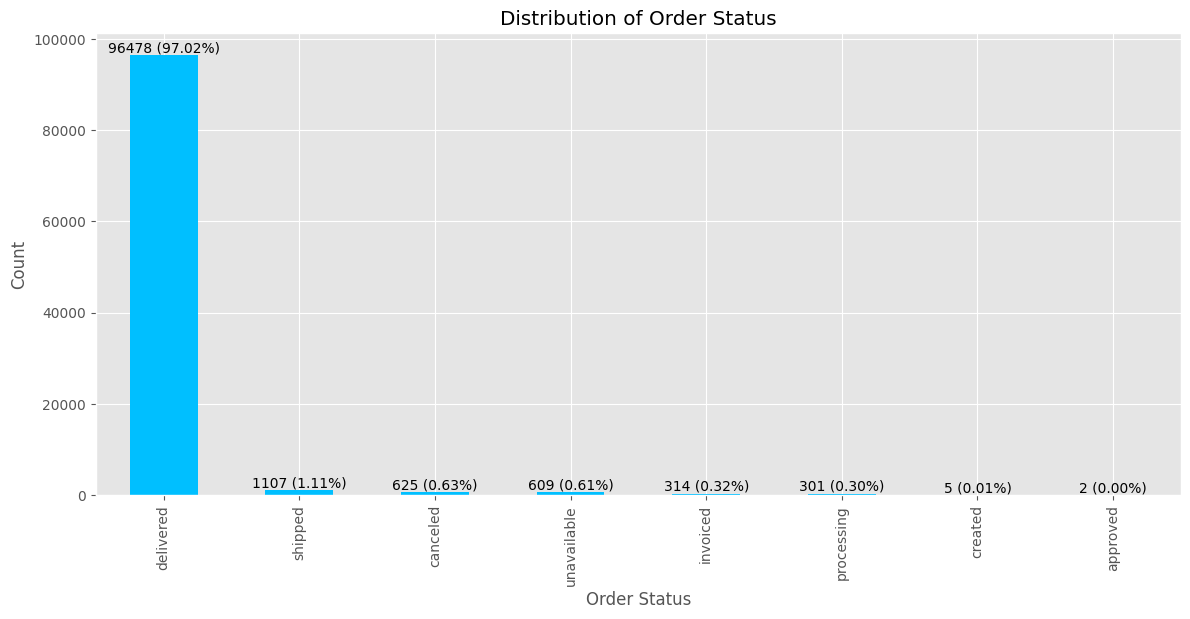

In [9]:
dataframes['olist_orders_dataset']['order_status'].value_counts().plot(kind='bar', figsize=(14, 6), color='deepskyblue')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Distribution of Order Status')

# Add labels with numbers and percentages
total_count = len(dataframes['olist_orders_dataset'])
for i, v in enumerate(dataframes['olist_orders_dataset']['order_status'].value_counts()):
    percentage = v / total_count * 100
    plt.text(i, v, f"{v} ({percentage:.2f}%)", ha='center', va='bottom')

plt.show()

In [10]:
df_date = pd.DataFrame()
df_date["datetime"] = pd.to_datetime(dataframes['olist_orders_dataset']['order_purchase_timestamp'])
df_date['year'] = df_date["datetime"].dt.year
df_date['month'] = df_date["datetime"].dt.month
df_date['day'] = df_date["datetime"].dt.day
df_date['hour'] = df_date["datetime"].dt.hour
df_date['dateodweek'] = df_date["datetime"].dt.dayofweek
df_date['day_name'] = df_date["datetime"].dt.day_name()
df_date["month_period"] = df_date["datetime"].dt.to_period('M')

Let's analyze the distribution of days of the week in our dataset.
# What is the destribution of sales for each day of the week?

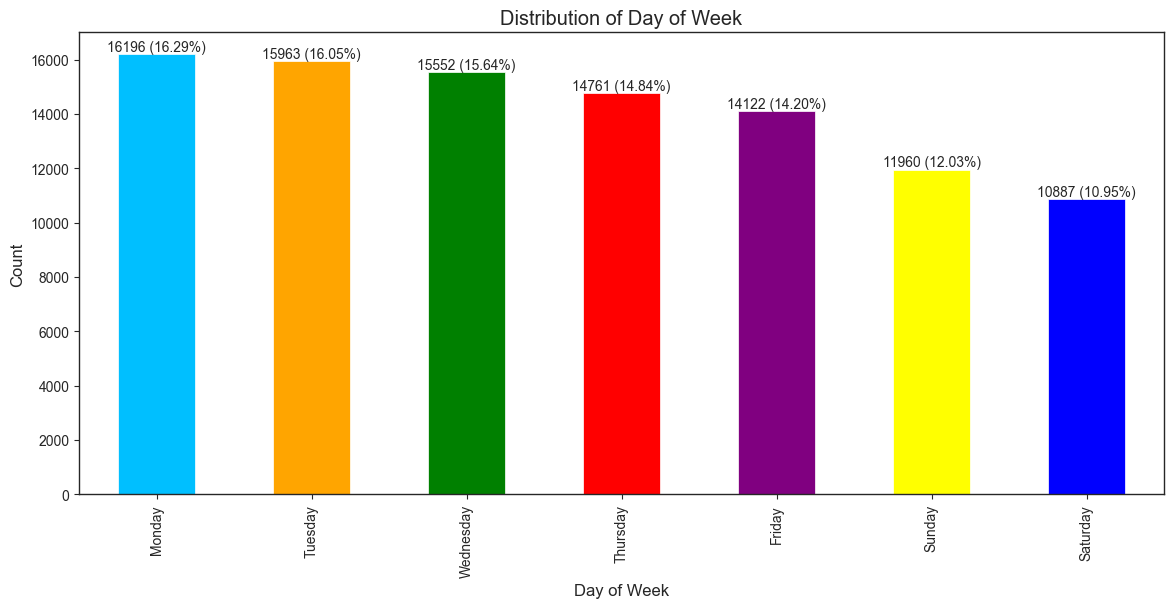

In [11]:

sns.set_style('ticks')

df_date['day_name'].value_counts().plot(kind='bar', figsize=(14, 6), color=['deepskyblue', 'orange', 'green', 'red', 'purple', 'yellow', 'blue'])
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Distribution of Day of Week')

# Add labels with numbers and percentages
total_count = len(df_date['day_name'])
for i, v in enumerate(df_date['day_name'].value_counts()):
    percentage = v / total_count * 100
    plt.text(i, v, f"{v} ({percentage:.2f}%)", ha='center', va='bottom')

plt.show()

Let's visualize the trend of sales over different months, considering all available periods.
# How does the sales count fluctuate across different months?

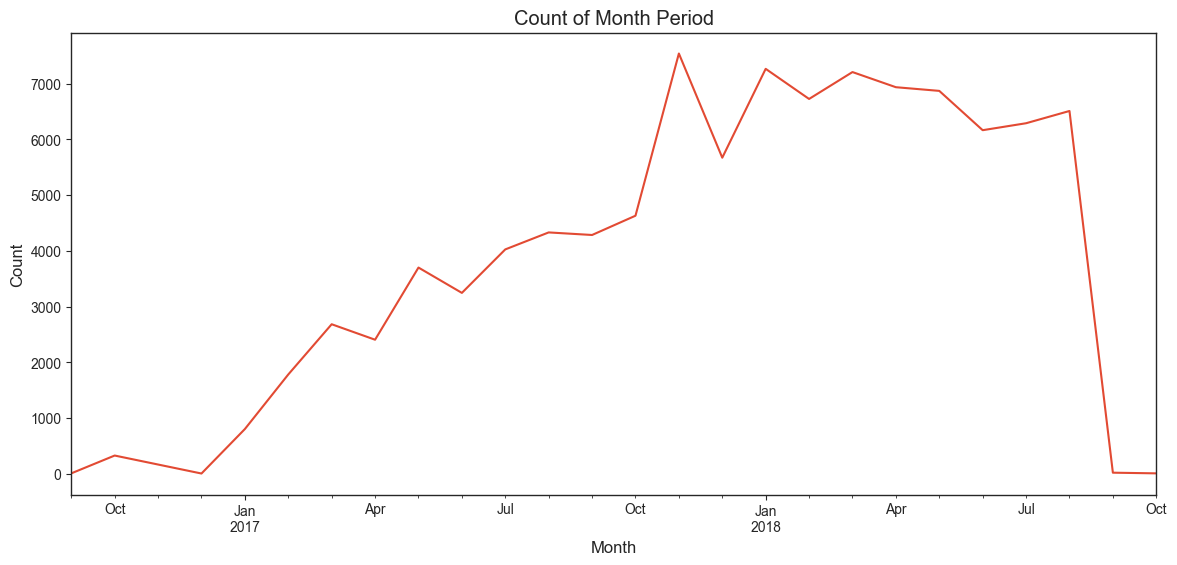

In [12]:

df_date["month_period"].value_counts().sort_index().plot(kind='line', figsize=(14, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Month Period')
plt.show()

Let's refine our visualization to display the count of month periods only for the non-corrupted data periods.
# How does the count of month periods vary over time when considering only the non-corrupted data periods?

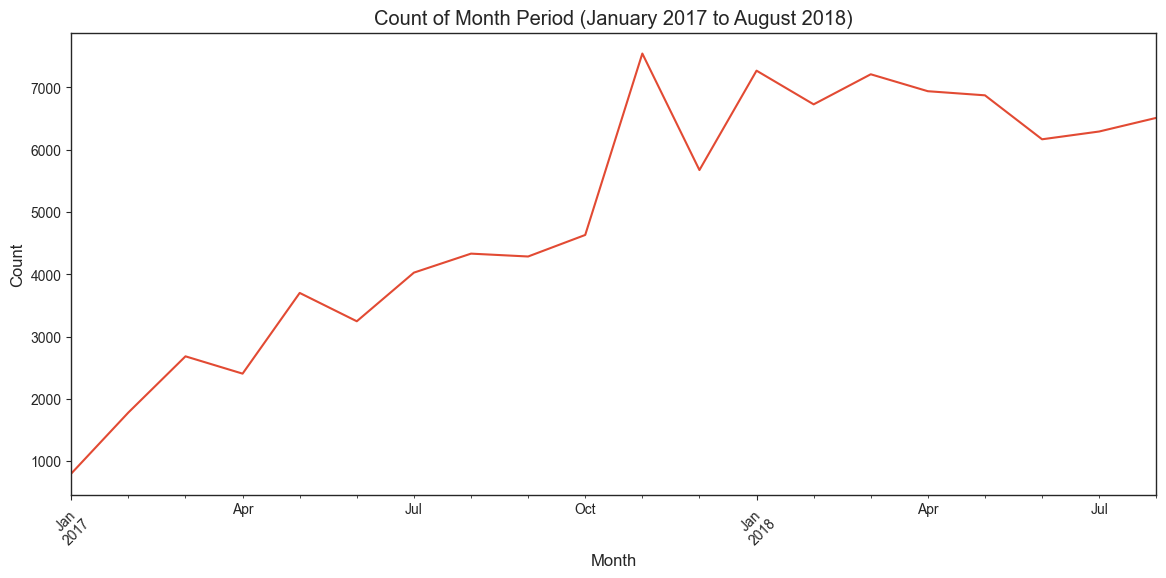

In [13]:
df_filtered = df_date[(df_date['datetime'] >= '2017-01-01') & (df_date['datetime'] <= '2018-08-31')]
df_filtered['month_period'].value_counts().sort_index().plot(kind='line', figsize=(14, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Month Period (January 2017 to August 2018)')
plt.xticks(rotation=45)
plt.show()

Let's examine the distribution of hours in our dataset using a histogram.
# What is the distribution of sales across different hours of the day?

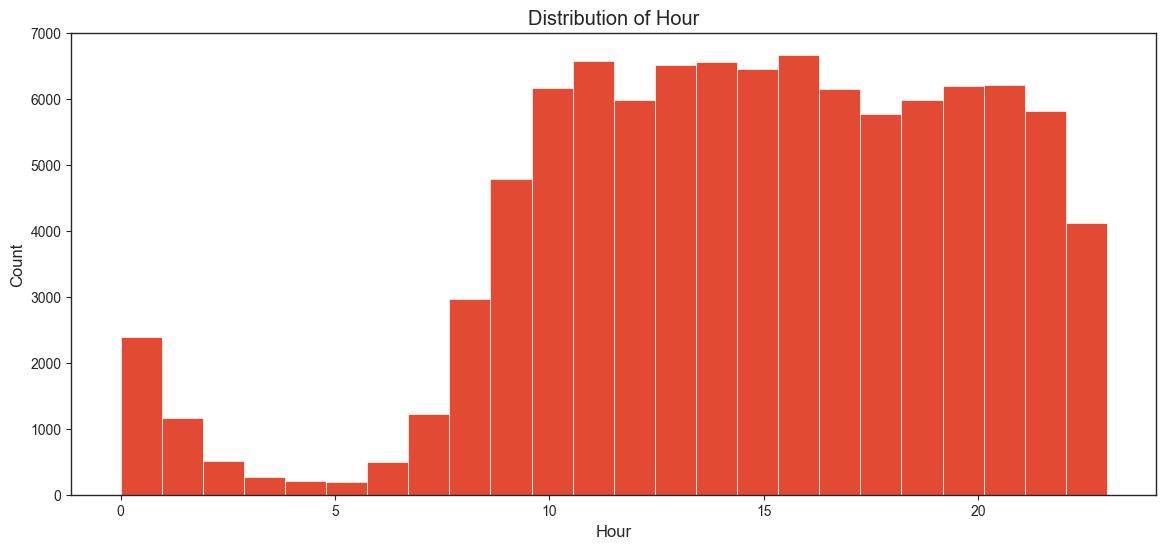

In [14]:
df_date['hour'].plot(kind='hist', bins=24, figsize=(14, 6),)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of Hour')
plt.show()

Let's compare the sales amount year-to-year, grouped by months, from January to August.
# How does the sales amount vary across different months for each year from the dataset?

C:\Users\admin\AppData\Local\Temp\ipykernel_15068\388708053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month_period_str'] = df_filtered.apply(lambda row: f'{row["year"]}-{row["month"]:02d}', axis=1)


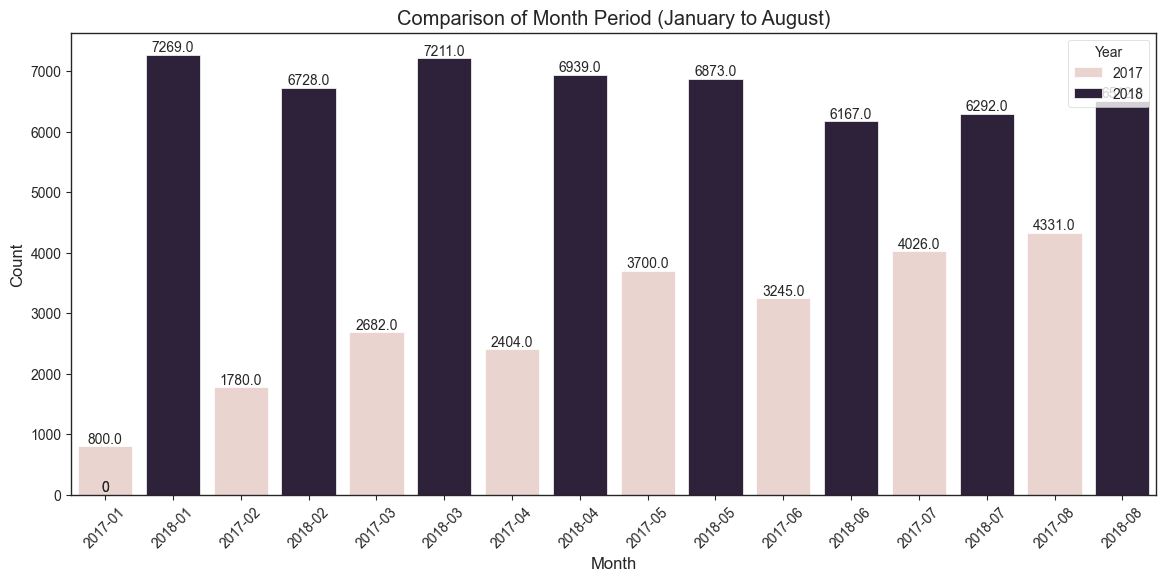

In [16]:
df_filtered = df_date[df_date["month"].between(1, 8)]

# Extract unique months and years
unique_months = sorted(df_filtered["month"].unique())
unique_years = sorted(df_filtered["year"].unique())

# Generate the custom order list with the desired order
custom_order = [f'{year}-{month:02d}' for month in unique_months for year in unique_years]

# Add a new column for plotting
df_filtered['month_period_str'] = df_filtered.apply(lambda row: f'{row["year"]}-{row["month"]:02d}', axis=1)

# Plotting
plt.figure(figsize=(14, 6))
sns.countplot(data=df_filtered, x='month_period_str', hue='year', order=custom_order)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Comparison of Month Period (January to August)')
plt.xticks(rotation=45)
plt.legend(title='Year')

# Add labels with numbers
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()


In [17]:
df_filtered['month_period_str'].groupby(df_filtered['year']).value_counts()


year  month_period_str
2017  2017-08             4331
      2017-07             4026
      2017-05             3700
      2017-06             3245
      2017-03             2682
      2017-04             2404
      2017-02             1780
      2017-01              800
2018  2018-01             7269
      2018-03             7211
      2018-04             6939
      2018-05             6873
      2018-02             6728
      2018-08             6512
      2018-07             6292
      2018-06             6167
Name: count, dtype: int64

In [18]:
# Merging the datasets
merged_df = pd.merge(dataframes['olist_orders_dataset'], dataframes['olist_customers_dataset'], on='customer_id')

# Grouping  and counting the number of orders
orders_by_city = merged_df['customer_city'].value_counts()
orders_by_state = merged_df['customer_state'].value_counts()
orders_by_zip_code_prefix = merged_df['customer_zip_code_prefix'].value_counts()



# Selecting the top 10 with the most orders
top_10_cities = orders_by_city.head(10)
top_10_states = orders_by_state.head(10)
top_10_zip_code_prefix = orders_by_zip_code_prefix.head(10)





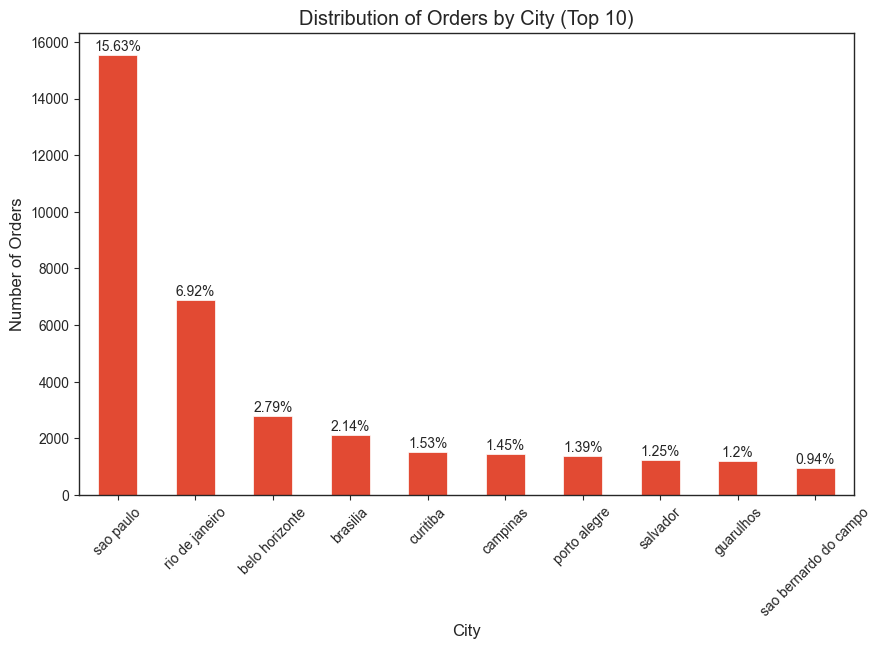

In [19]:
plt.figure(figsize=(10, 6))
ax = top_10_cities.plot(kind='bar')
plt.title('Distribution of Orders by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

# Add labels and percentages
for i, v in enumerate(top_10_cities):
    percentage = round((v / orders_by_city .sum()) * 100, 2)
    ax.text(i, v + 50, f'{percentage}%', ha='center', va='bottom')

plt.show()


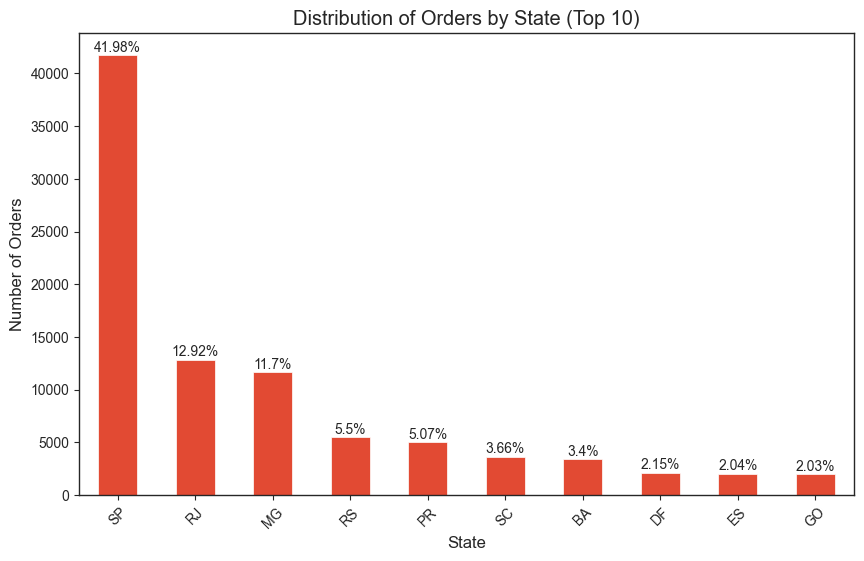

In [20]:
plt.figure(figsize=(10, 6))
ax = top_10_states.plot(kind='bar')
plt.title('Distribution of Orders by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

# Add labels and percentages
for i, v in enumerate(top_10_states):
    percentage = round((v / orders_by_state .sum()) * 100, 2)
    ax.text(i, v + 50, f'{percentage}%', ha='center', va='bottom')

plt.show()

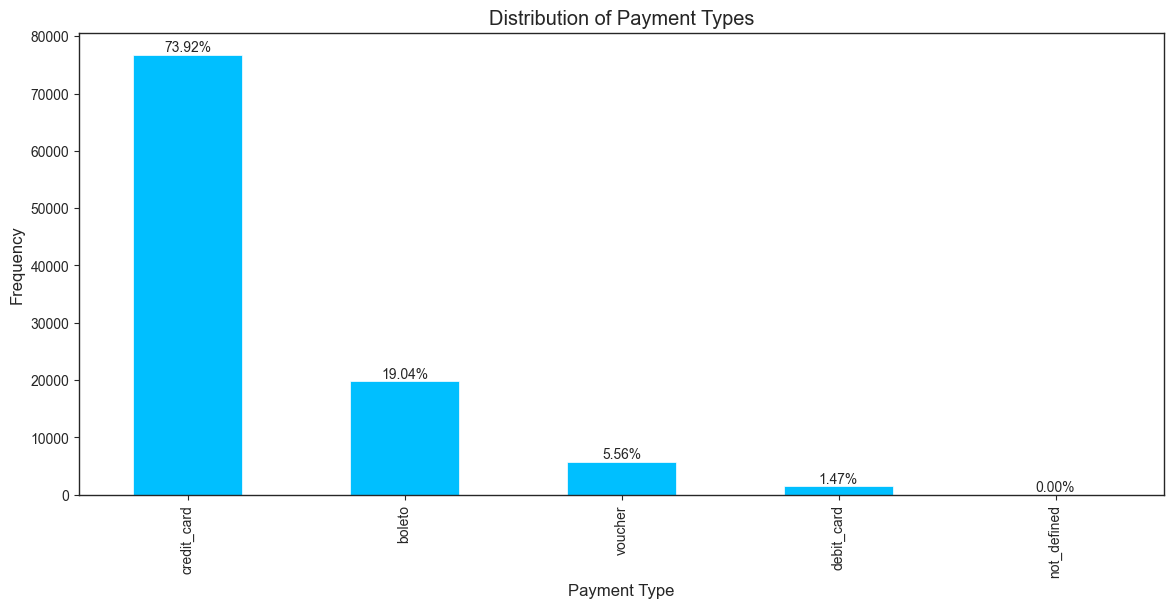

In [22]:
payment_counts = dataframes["olist_order_payments_dataset"]['payment_type'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(14, 6))
payment_counts.plot(kind='bar', color='deepskyblue')

# Adding percentage labels
total = sum(payment_counts)
for i, count in enumerate(payment_counts):
    pct_string = f'{100 * count / total:.2f}%'
    plt.text(i, count, pct_string, ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Types')
plt.show()

NLP

In [56]:
import requests
import json
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [54]:
df_orders = dataframes["olist_orders_dataset"].merge(dataframes["olist_customers_dataset"], how='left', on='customer_id')



# Merging orders and order_items
df_orders_items = df_orders.merge(dataframes["olist_order_items_dataset"], how='left', on='order_id')

# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

# Threting geolocations outside brazilian map

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = dataframes["olist_geolocation_dataset"][dataframes["olist_geolocation_dataset"].geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

# Merging all the informations
df_orders_items = df_orders_items.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_orders_items = df_orders_items.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
df_orders_items.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3           2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4           2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix  ... freight_value  id  sigla  \
0                      3149  ...          8.72  35     SP   
1                     47813  ...         22.76  29     BA   
2                     75265  ...         19.22  52     GO   
3                     59296  ...         27.20  24     RN   
4                      9195  ...          8.72  35     SP   

                  nome   nome_regiao geolocation_zip_code_prefix  \
0            São Paulo       Sudeste                      3149.0   
1                Bahia      Nordeste                     47813.0   
2                Goiás  Centro-Oeste                     75265.0   
3  Rio Grande do Norte      Nordeste                     59296.0   
4            São Paulo       Sudeste                      9195.0   

   geolocation_lat  geolocation_lng         geolocation_city geolocation_state  
0       -23.583885       -46.587473                sao paulo                SP  
1       -12.945892       -45.016313                barreiras                BA  
2       -16.752735       -48.522139               vianopolis                GO  
3        -5.778488       -35.281450  sao goncalo do amarante                RN  
4       -23.760018       -46.524784              santo andre                SP  

[5 rows x 27 columns]

In [58]:
# Zipping locations
lats = list(df_orders_items['geolocation_lat'].dropna().values)
longs = list(df_orders_items['geolocation_lng'].dropna().values)
locations = list(zip(lats, longs))

# Creating a mapa using folium
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1

In [57]:
# Grouping geolocation data for plotting a heatmap
heat_data = df_orders_items.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count().iloc[:, :3]

# Creating a mapa using folium
map1 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMap
HeatMap(
    name='Mapa de Calor',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(map1)

map1